# Customer Churn Prediction

## Subset Libraries

In [21]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering & Prepocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# Model Training
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report
#xgboost, svm

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Subset Data

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/FahdAby/2-Customer-Churn-Prediction/master/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/FahdAby/2-Customer-Churn-Prediction/master/test.csv")


In [3]:
train_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,jabar,Male,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27.0,NaN,194221253.6,1.0,1.0,1.0,1.781762e+08,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7000 non-null   int64  
 1   credit_score      7000 non-null   int64  
 2   country           6845 non-null   object 
 3   gender            7000 non-null   object 
 4   age               6759 non-null   float64
 5   tenure            6712 non-null   float64
 6   balance           6883 non-null   float64
 7   products_number   6852 non-null   float64
 8   credit_card       6841 non-null   float64
 9   active_member     6863 non-null   float64
 10  estimated_salary  6855 non-null   float64
 11  churn             7000 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 656.4+ KB


## Data Understanding

### Daftar Kolom

In [5]:
cat_cols = ["country", "products_number"]
bin_cols = ["gender", "credit_card", "active_member"]
num_cols = ["age", "tenure", "balance", "credit_score", "estimated_salary"]

In [6]:
train_df.shape

(7000, 12)

### Mengecek Missing Value

In [7]:
print("---Check Keberadaan NaN---")
print(train_df.isnull().any())
print("---Check JUmlah NaN---")
print(train_df.isnull().sum())

---Check Keberadaan NaN---
customer_id         False
credit_score        False
country              True
gender              False
age                  True
tenure               True
balance              True
products_number      True
credit_card          True
active_member        True
estimated_salary     True
churn               False
dtype: bool
---Check JUmlah NaN---
customer_id           0
credit_score          0
country             155
gender                0
age                 241
tenure              288
balance             117
products_number     148
credit_card         159
active_member       137
estimated_salary    145
churn                 0
dtype: int64


<Axes: >

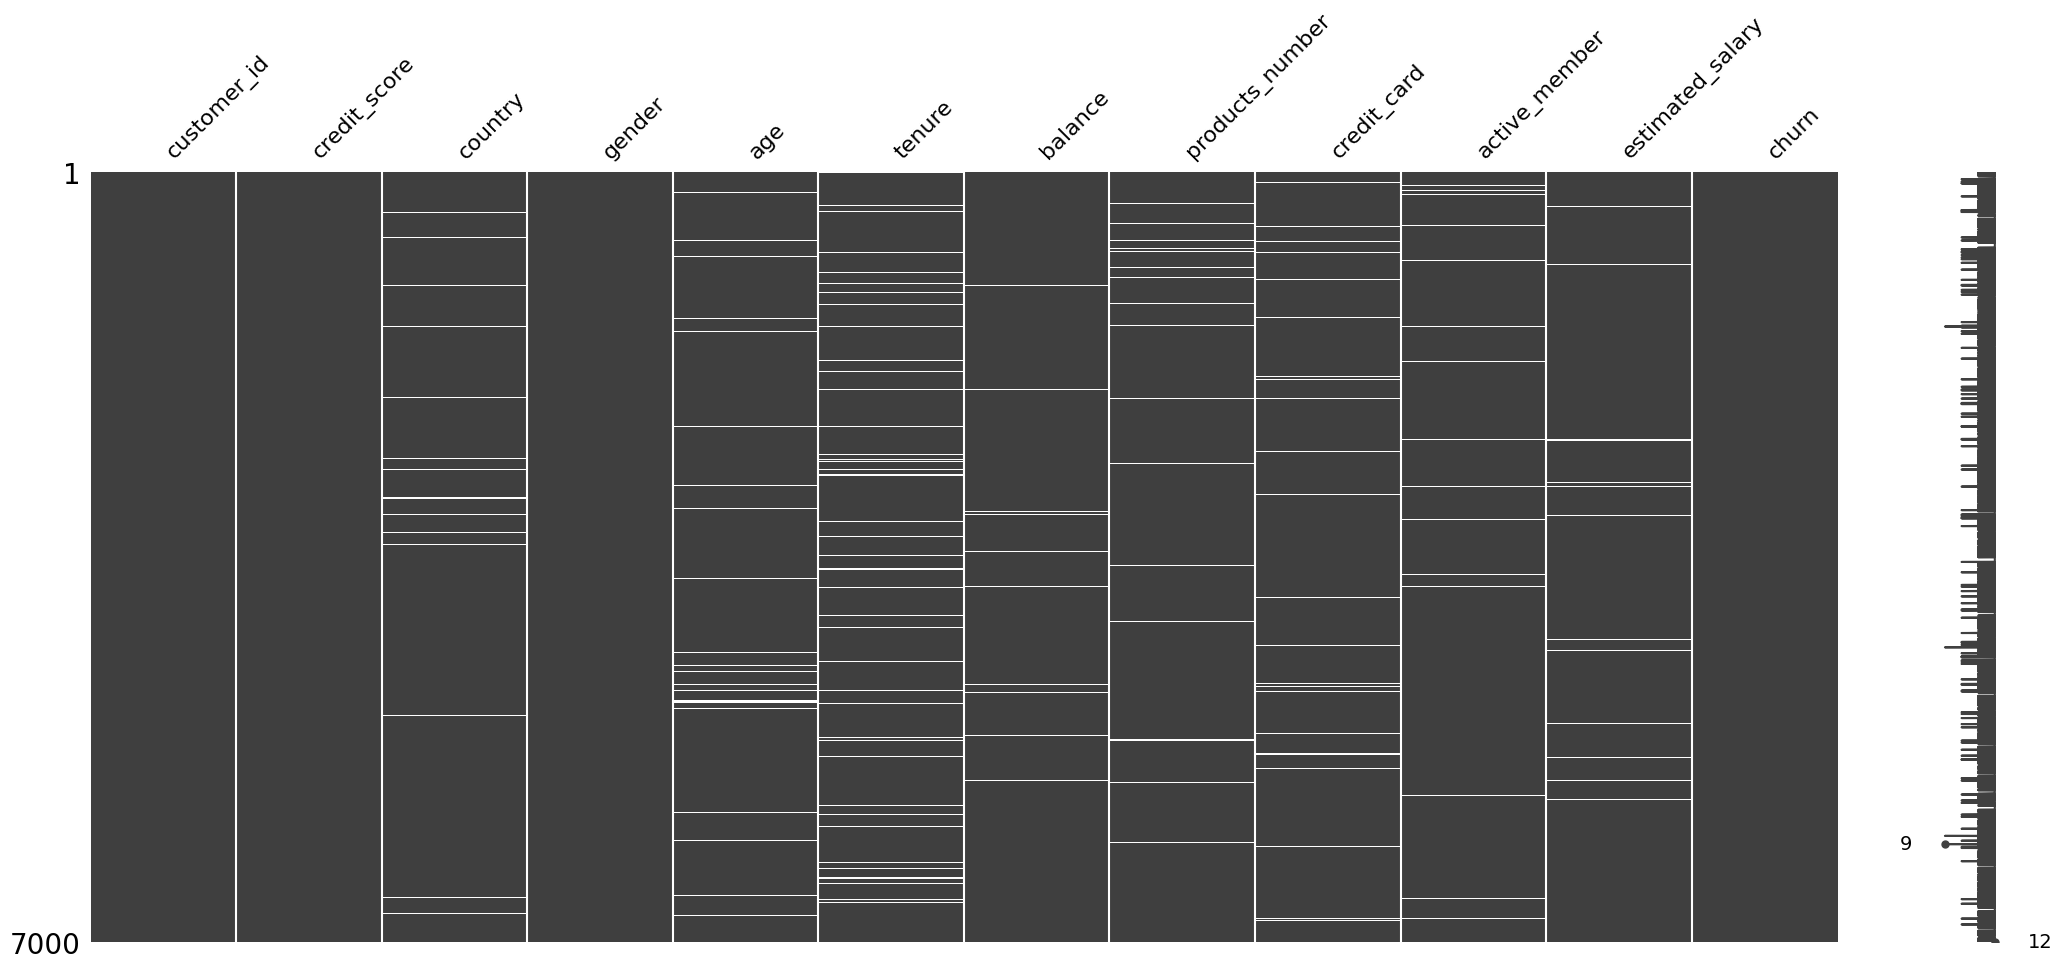

In [8]:
msno.matrix(train_df)

Catatan :

Fungsi msno.matrix(train_df) digunakan untuk membuat matriks visualisasi yang menunjukkan keberadaan nilai yang hilang (missing values) dalam DataFrame train_df. Visualisasi ini memungkinkan pengguna untuk dengan cepat memahami pola kekosongan nilai dalam data mereka.

### Mengecek Jumlah Unique Value pada setiap Kolom

In [9]:
print("---Jumlah Unique Value pada setiap Kolom---")
train_df.nunique()

---Jumlah Unique Value pada setiap Kolom---


customer_id         7000
credit_score         453
country                9
gender                 2
age                   70
tenure                11
balance             4400
products_number        4
credit_card            2
active_member          2
estimated_salary    6854
churn                  2
dtype: int64

### Mengecek Data Duplicate

In [10]:
print("---Mengecek Data Duplikat---")
train_df.duplicated().sum()

---Mengecek Data Duplikat---


0

### Statistika Deskripsi Data

In [11]:
train_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,7.000000e+03,7000.000000,6759.000000,6712.000000,6.883000e+03,6852.000000,6841.000000,6863.000000,6.855000e+03,7000.000000
mean,1.569149e+07,649.979714,38.902500,5.050805,1.289241e+08,1.537215,0.702529,0.512312,1.674342e+08,0.201429
std,7.230107e+04,97.154616,10.478227,2.898514,1.396340e+08,0.582616,0.457179,0.499885,1.456601e+08,0.401096
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.799324e+04,0.000000
25%,1.562885e+07,583.000000,32.000000,3.000000,0.000000e+00,1.000000,0.000000,0.000000,7.940980e+07,0.000000
50%,1.569116e+07,652.000000,37.000000,5.000000,1.520481e+08,1.000000,1.000000,1.000000,1.563378e+08,0.000000
75%,1.575454e+07,717.000000,44.000000,8.000000,1.992249e+08,2.000000,1.000000,1.000000,2.325842e+08,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,1.712257e+09,4.000000,1.000000,1.000000,1.606589e+09,1.000000


### Understanding Kolom Kategorik

In [12]:
print("-- Gender --")
train_df.gender.value_counts()

-- Gender --


gender
Male      3774
Female    3226
Name: count, dtype: int64

In [13]:
print("-- Country --")
train_df.country.value_counts()

-- Country --


country
Jawa Timur     2758
Jawa Barat     1414
Jawa Tengah    1336
jatim           337
jawatimur       329
jawatengah      175
jawabarat       174
jabar           161
jateng          161
Name: count, dtype: int64

Catatan : 

Terdapat bermacam-macam provinsi yang sebenarnya merupakan provinsi yang sama

### Understanding Kolom Binari

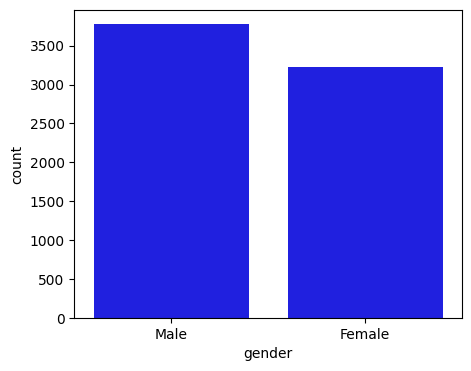

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_df, x=train_df["gender"], color="blue")
plt.show()

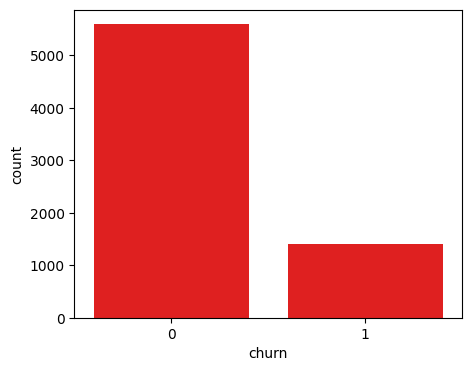

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_df, x=train_df["churn"], color="red")
plt.show()

### Understanding Kolom Numerik

#### Boxplot pada setiap kolom

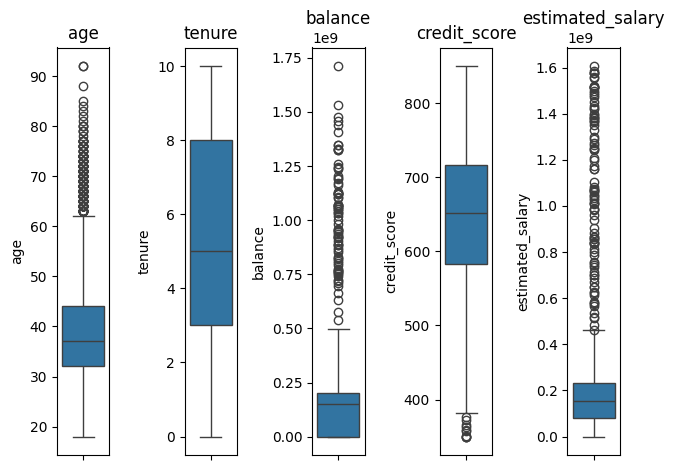

In [16]:
# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(num_cols))

# Create the boxplot with Seaborn
for column, axis in zip(num_cols, axes):
        sns.boxplot(data=train_df[column], ax=axis)
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

Terdapat outliers yang sangat banyak pada variabel *balance*, *estimated_salary*, dan *age*.

Mungkin perlu dilakukan handling pada variabel-variabel tersebut

#### Korelasi Antar Variabel Numerik

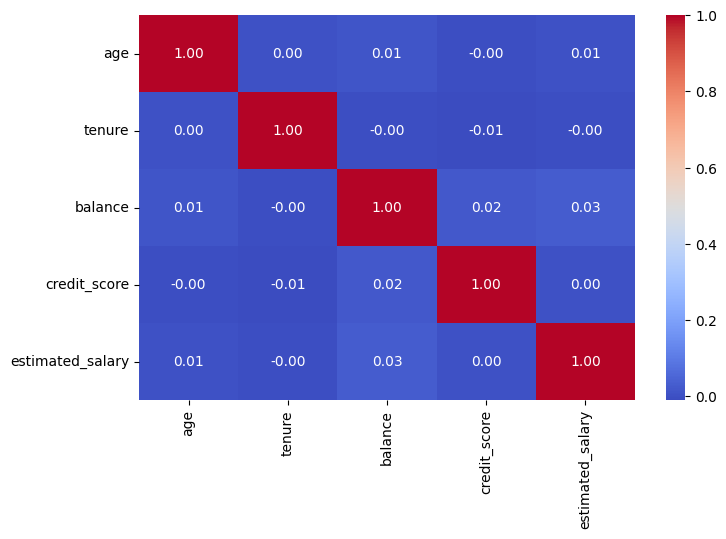

In [17]:
# Lets plot the correlation matrix
train_df_num = train_df[num_cols]
plt.figure(figsize=(8,5))
sns.heatmap(train_df_num.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## Splitting Data

In [18]:
from sklearn.model_selection import train_test_split

def train_test_split_data(dataframe, test_size, random_state):
    x_train, x_test = train_test_split(dataframe, test_size=test_size, random_state=random_state)
    return x_train, x_test

# Contoh penggunaan:
train, test = train_test_split_data(dataframe=train_df, test_size=0.3, random_state=42)

In [19]:
train.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1612,15688691,665,Jawa Barat,Female,51.0,9.0,1.718687e+08,2.0,0.0,1.0,1.729029e+06,1
978,15716619,580,Jawa Barat,Female,36.0,3.0,1.164975e+08,1.0,1.0,1.0,1.880071e+07,0
3050,15676571,850,Jawa Timur,Male,55.0,6.0,0.000000e+00,1.0,1.0,0.0,1.467443e+06,1
4960,15815125,668,Jawa Tengah,Male,45.0,4.0,1.592451e+08,2.0,1.0,1.0,2.460928e+08,0
2548,15769948,737,jawabarat,Male,35.0,0.0,1.071457e+09,1.0,0.0,1.0,9.952247e+07,0


## Preprosesing

### Data Cleaning dengan Pipeline

In [22]:
# Data Cleaning

cat_cols = ['country', 'gender']
bin_cols = ['credit_card', 'active_member'] #churn = target
num_cols = ['age', 'tenure', 'balance', 'credit_score', 'estimated_salary', 'products_number']

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('namarandombuatkategori', categorical_pipeline, cat_cols),
        ('binary', binary_pipeline, bin_cols),
        ('num', numeric_pipeline, num_cols),
        ('drop_col', 'drop', "customer_id")
        # ('pass', 'passthrough', pass_cols)
    ],
    remainder='passthrough'
)

pipeline_with_model = Pipeline([
    ('prepro', preprocessor),
    ('model', RandomForestClassifier(random_state=3))
])

In [24]:
cat_pipe_result = pd.DataFrame(categorical_pipeline.fit_transform(train[["country"]]).toarray(), columns = categorical_pipeline.get_feature_names_out())

In [26]:
cat_pipe_result["asli"] = train["country"].reset_index(drop=True)

In [27]:
cat_pipe_result

,country_Jawa Barat,country_Jawa Tengah,country_Jawa Timur,country_jabar,country_jateng,country_jatim,country_jawabarat,country_jawatengah,country_jawatimur,asli
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jawa Barat
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jawa Barat
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Jawa Timur
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jawa Tengah
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,jawabarat
...,...,...,...,...,...,...,...,...,...,...
4895,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,jateng
4896,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Jawa Timur
4897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,jawatimur
4898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jawa Barat


In [28]:
num_pipe_result = pd.DataFrame(numeric_pipeline.fit_transform(train[num_cols]), columns = numeric_pipeline.get_feature_names_out())

In [30]:
train[num_cols]

,age,tenure,balance,credit_score,estimated_salary,products_number
1612,51.0,9.0,1.718687e+08,665,1.729029e+06,2.0
978,36.0,3.0,1.164975e+08,580,1.880071e+07,1.0
3050,55.0,6.0,0.000000e+00,850,1.467443e+06,1.0
4960,45.0,4.0,1.592451e+08,668,2.460928e+08,2.0
2548,35.0,0.0,1.071457e+09,737,9.952247e+07,1.0
...,...,...,...,...,...,...
3772,39.0,6.0,2.069908e+08,850,3.227265e+07,1.0
5191,40.0,3.0,2.568435e+08,540,3.105507e+08,1.0
5226,52.0,NaN,2.563461e+08,625,1.053311e+08,1.0
5390,44.0,9.0,1.559548e+08,690,5.491562e+07,2.0


In [31]:
num_pipe_result

,age,tenure,balance,credit_score,estimated_salary,products_number
0,1.173383,1.390511,0.290274,0.152213,-1.128428,0.815593
1,-0.274314,-0.723405,-0.095402,-0.732017,-1.011945,-0.893003
2,1.559436,0.333553,-0.906838,2.076713,-1.130212,-0.893003
3,0.594304,-0.371086,0.202347,0.183421,0.538896,0.815593
4,-0.370827,-1.780363,6.556149,0.901208,-0.461171,-0.893003
...,...,...,...,...,...,...
4895,0.015225,0.333553,0.534908,2.076713,-0.920025,-0.893003
4896,0.111739,-0.723405,0.882146,-1.148125,0.978700,-0.893003
4897,1.269897,-0.018766,0.878682,-0.263895,-0.421538,-0.893003
4898,0.497791,1.390511,0.179429,0.412280,-0.765529,0.815593


In [32]:
X_train = train.drop(columns = "churn")
y_train = train["churn"]
X_test = test.drop(columns = "churn")
y_test = test["churn"]

In [33]:
df_prepocessed = X_train.copy()
df_prepocessed = df_prepocessed.drop(columns = "customer_id", axis=1)
df_prepocessed.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1612,665,Jawa Barat,Female,51.0,9.0,1.718687e+08,2.0,0.0,1.0,1.729029e+06
978,580,Jawa Barat,Female,36.0,3.0,1.164975e+08,1.0,1.0,1.0,1.880071e+07
3050,850,Jawa Timur,Male,55.0,6.0,0.000000e+00,1.0,1.0,0.0,1.467443e+06
4960,668,Jawa Tengah,Male,45.0,4.0,1.592451e+08,2.0,1.0,1.0,2.460928e+08
2548,737,jawabarat,Male,35.0,0.0,1.071457e+09,1.0,0.0,1.0,9.952247e+07


### Cleaning Format yang tidak Konsisten

In [34]:
mapping = {'jatim':'Jawa Timur',
           'jawatimur':'Jawa Timur',
           'jawatengah':'Jawa Tengah',
           'jawabarat':'Jawa Barat',
           'jabar':'Jawa Barat',
           'jateng':'Jawa Tengah'}

df_prepocessed["country"] = df_prepocessed["country"].map(mapping)

df_prepocessed.country.value_counts()

country
Jawa Timur     460
Jawa Barat     238
Jawa Tengah    228
Name: count, dtype: int64

### Mengatasi Missing Value

In [36]:
from sklearn.impute import SimpleImputer

#### Kolom Kategorik

In [37]:
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_prepocessed[cat_cols] = cat_imputer.fit_transform(df_prepocessed[cat_cols])
print(df_prepocessed[cat_cols].isna().sum())

country    0
gender     0
dtype: int64


#### Kolom Binary

In [38]:
bin_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_prepocessed[bin_cols] = bin_imputer.fit_transform(df_prepocessed[bin_cols])
print(df_prepocessed[bin_cols].isna().sum())

credit_card      0
active_member    0
dtype: int64


#### Kolom Numerik

-> Input MEAN

In [39]:
num_imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_prepocessed[['tenure', 'credit_score']] = num_imputer_mean.fit_transform(df_prepocessed[['tenure', 'credit_score']])
print(df_prepocessed[['tenure', 'credit_score']].isna().sum())

tenure          0
credit_score    0
dtype: int64


-> Input MEDIAN

In [40]:
num_imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_prepocessed[['age', 'balance', 'estimated_salary', 'age']] = num_imputer_mean.fit_transform(df_prepocessed[['age', 'balance', 'estimated_salary', 'age']])
print(df_prepocessed[['age', 'balance', 'estimated_salary', 'age']].isna().sum())

age                 0
balance             0
estimated_salary    0
age                 0
dtype: int64


<Axes: >

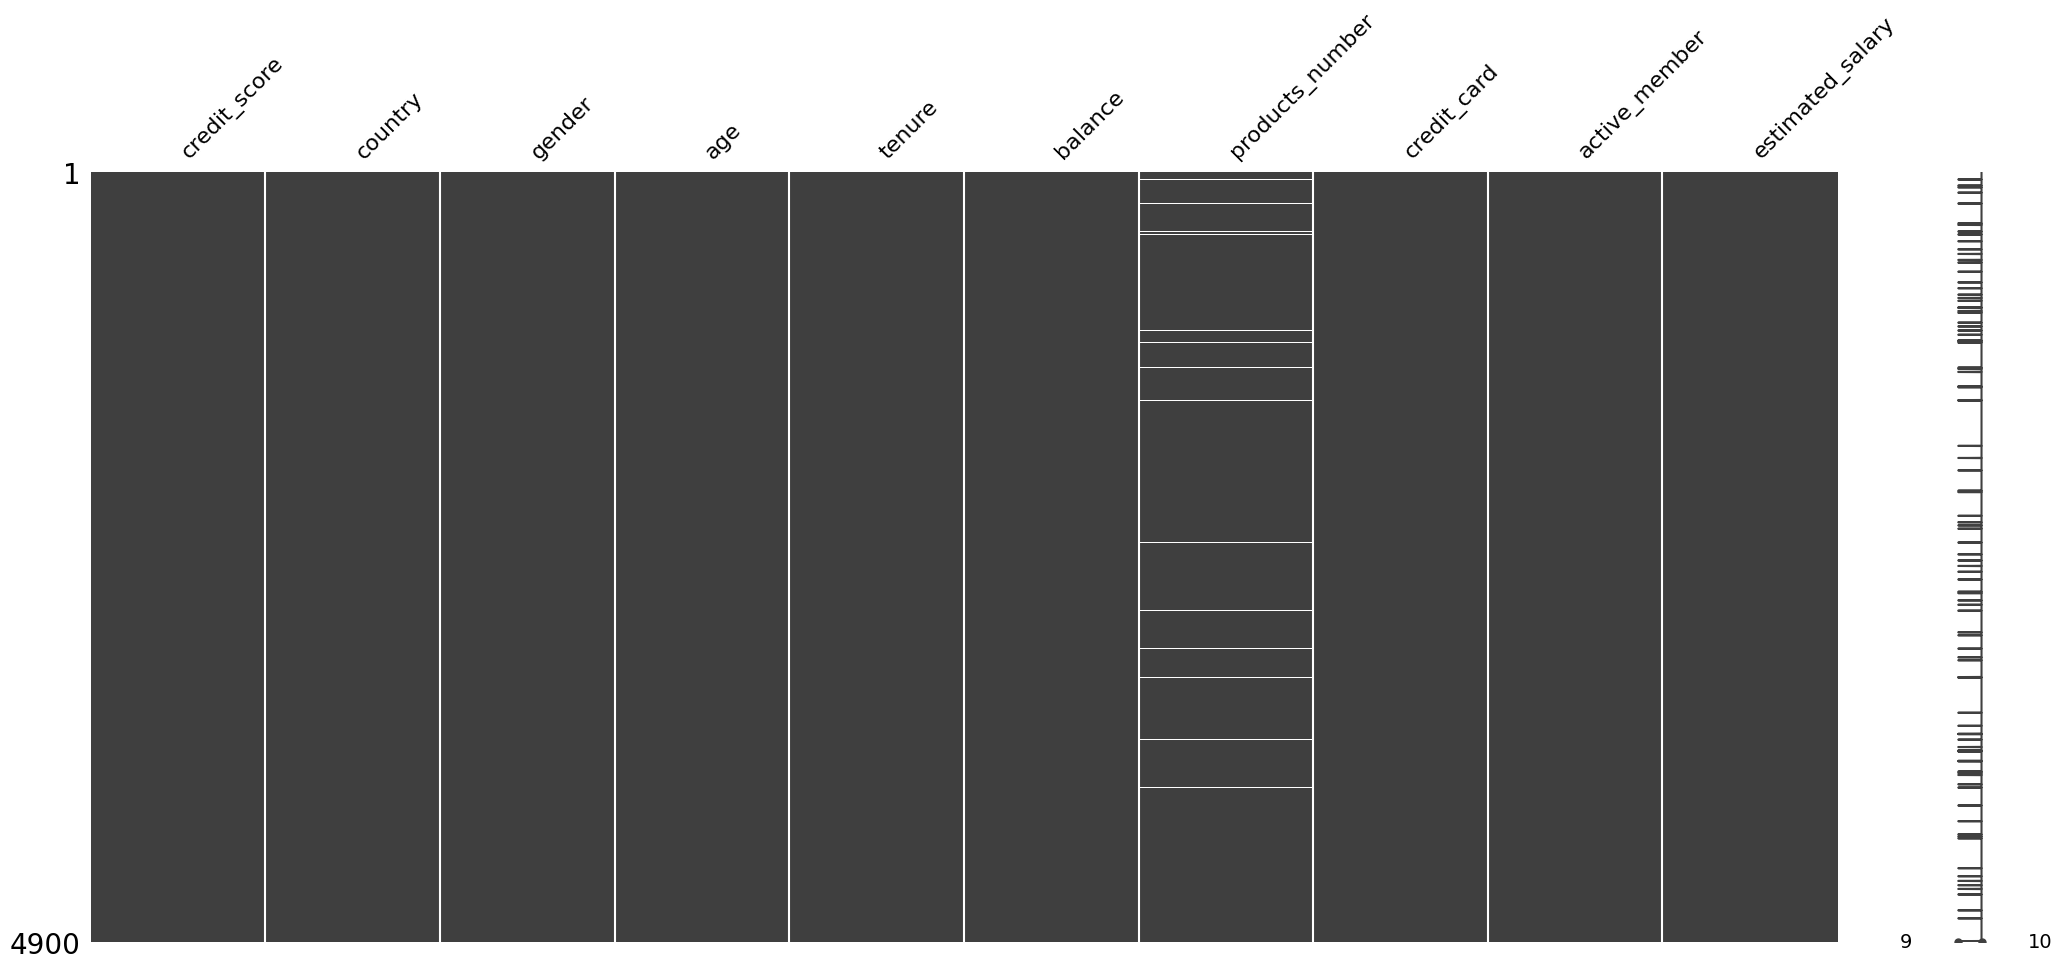

In [41]:
msno.matrix(df_prepocessed)

## Transformer Kolom

In [42]:
preprocessed_X_train = preprocessor.fit_transform(X_train)
preprocessed_X_train = pd.DataFrame(preprocessed_X_train, columns = [x.split("_")[-1] for x in preprocessor.get_feature_names_out()])

In [43]:
y_train.value_counts()

churn
0    3880
1    1020
Name: count, dtype: int64

In [44]:
preprocessed_X_train

,Jawa Barat,Jawa Tengah,Jawa Timur,jabar,jateng,jatim,jawabarat,jawatengah,jawatimur,Female,Male,card,member,age,tenure,balance,score,salary,number
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.173383,1.390511,0.290274,0.152213,-1.128428,0.815593
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.274314,-0.723405,-0.095402,-0.732017,-1.011945,-0.893003
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.559436,0.333553,-0.906838,2.076713,-1.130212,-0.893003
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.594304,-0.371086,0.202347,0.183421,0.538896,0.815593
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.370827,-1.780363,6.556149,0.901208,-0.461171,-0.893003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.015225,0.333553,0.534908,2.076713,-0.920025,-0.893003
4896,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.111739,-0.723405,0.882146,-1.148125,0.978700,-0.893003
4897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.269897,-0.018766,0.878682,-0.263895,-0.421538,-0.893003
4898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.497791,1.390511,0.179429,0.412280,-0.765529,0.815593


## SMOTE Oversampling

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote= sm.fit_resample(preprocessed_X_train, y_train)

In [47]:
y_train_smote.value_counts()

churn
1    3880
0    3880
Name: count, dtype: int64

## Pemodelan

### Model 1. Gradient Boosting Classifier

In [48]:
weights = y_train_smote.replace(1,10).replace(0,1).values.tolist()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Accuracy:[0.49666666666666665]
F1-Score:[0.4065131948343627]
Precision:[0.9282051282051282]
Recall:[0.26024442846872753]
-------------------------------
Classifiaction Report
-------------------------------
              precision    recall  f1-score   support

           0      0.961     0.398     0.563      1710
           1      0.260     0.928     0.407       390

    accuracy                          0.497      2100
   macro avg      0.610     0.663     0.485      2100
weighted avg      0.830     0.497     0.534      2100

Confusion_Matrix


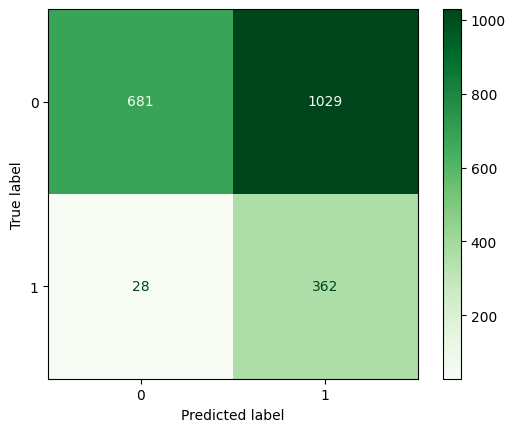

In [49]:
preprocessed_x_test = preprocessor.transform(X_test)

gbc=GradientBoostingClassifier()
gbc.fit(x_train_smote,y_train_smote, sample_weight = weights)
y_pred= gbc.predict(preprocessed_x_test)

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Report")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Greens")
plt.show()

## Train di seluruh training data

In [50]:
gbc.fit(preprocessor.fit_transform(train_df.drop(columns='churn')), train_df['churn'])

GradientBoostingClassifier()

## Output

In [51]:
df_submisi = test_df[["customer_id"]].copy()

In [52]:
test_df_preprocessed = preprocessor.transform(test_df)
df_submisi['churn'] = gbc.predict(test_df_preprocessed)

In [53]:
df_submisi.to_csv('D:/Kuliah UNAIR/Projek Aby/2 Projek (Customer Churn Prediction)/submisi_iris_doa_ibu.csv', index=False)